# Modelling dengan LSA

Latent Semantic Analysis (LSA) merupakan sebuah metode yang memanfaatkan model statistik matematis untuk menganalisa struktur semantik suatu teks. LSA bisa digunakan untuk menilai esai dengan mengkonversikan esai menjadi matriks-matriks yang diberi nilai pada masing-masing term untuk dicari kesamaan dengan term referensi. Secara umum, langkah-langkah LSA dalam penilaian esai adalah sebagai berikut:

## Import Library

In [39]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize

#preprocessing
from nltk.corpus import stopwords  #stopwords
from nltk import word_tokenize,sent_tokenize # tokenizing
from nltk.stem import PorterStemmer,LancasterStemmer  # using the Porter Stemmer and Lancaster Stemmer and others
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  # lammatizer from WordNet

# for named entity recognition (NER)
from nltk import ne_chunk

# vectorizers for creating the document-term-matrix (DTM)
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

#stop-words
stop_words=set(nltk.corpus.stopwords.words('english'))

## Loading Dataset

In [40]:
df = pd.read_csv("TextPreprocessing.csv", usecols=["abstrak"])

In [41]:
df.head()

,abstrak
0,"['produktivitas', 'kerja', 'pelatihan', 'penge..."
1,"['the', 'of', 'and', 'to', 'productivity', 'is..."
2,"['are', 'they', 'electronic', 'journals', 'ejo..."


## Latent Semantic Analysis (LSA)

Singular Value Decomposition (SVD) adalah salah satu teknik reduksi dimensi yang bermanfaat untuk memperkecil nilai kompleksitas dalam pemrosesan term-document matrix. SVD merupakan teorema aljabar linier yang menyebutkan bahwa persegi panjang dari term-document matrix dapat dipecah/didekomposisikan menjadi tiga matriks, yaitu :

    - Matriks ortogonal U
    - Matriks diagonal S
    - Transpose dari matriks ortogonal V
Yang dirumuskan dengan :
$A_{mn} = U_{mm} \times S_{mn} \times V_{nn}^{T}$

$A_{mn}$ = matriks awal

$U_{mm}$ = matriks ortogonal U

$S_{mn}$ = matriks diagonal s

$V_{nn}^{T}$ = transpose matriks ortogonal v

In [43]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)
vect=TfidfVectorizer(stop_words=stop_words,max_features=1000)
vect_text=vect.fit_transform(df['abstrak'])
lsa_top=lsa_model.fit_transform(vect_text)


In [44]:
print(lsa_top)
print(lsa_top.shape)  # (no_of_doc*no_of_topics)

[[ 5.93011225e-01 -5.74416119e-01 -5.64255092e-01]
 [ 7.24453584e-01  2.73158232e-14  6.89323585e-01]
 [ 4.16137816e-01  8.18563450e-01 -3.95958579e-01]]
(3, 3)


In [45]:
l=lsa_top[0]
print("Document 0 :")
for i,topic in enumerate(l):
  print("Topic ",i," : ",topic*100)
  


Document 0 :
Topic  0  :  59.30112248059728
Topic  1  :  -57.44161193441053
Topic  2  :  -56.425509221608024


In [46]:
print(lsa_model.components_.shape) # (no_of_topics*no_of_words)
print(lsa_model.components_)

(3, 257)
[[ 6.29091809e-02  6.29091809e-02  6.29091809e-02  7.15102091e-02
   7.15102091e-02  6.29091809e-02  6.29091809e-02  6.29091809e-02
   6.29091809e-02  6.29091809e-02  5.44566318e-02  1.02229411e-01
   5.44566318e-02  5.44566318e-02  6.29091809e-02  6.29091809e-02
   6.29091809e-02  6.29091809e-02  6.29091809e-02  7.15102091e-02
   7.15102091e-02  6.29091809e-02  6.29091809e-02  5.44566318e-02
   8.92597257e-02  6.29091809e-02  5.44566318e-02  5.44566318e-02
   5.44566318e-02  5.44566318e-02  6.29091809e-02  6.29091809e-02
   6.29091809e-02  6.29091809e-02  6.29091809e-02  6.29091809e-02
   5.44566318e-02  6.29091809e-02  6.29091809e-02  5.44566318e-02
   6.29091809e-02  6.29091809e-02  5.44566318e-02  5.44566318e-02
   6.29091809e-02  5.44566318e-02  5.44566318e-02  5.44566318e-02
   5.44566318e-02  6.29091809e-02  7.15102091e-02  5.44566318e-02
   6.29091809e-02  5.44566318e-02  6.29091809e-02  5.44566318e-02
   6.29091809e-02  6.29091809e-02  6.29091809e-02  6.29091809e-02
 

In [47]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
also purpose study bangkalan non probality random sampling simple spss 

Topic 1: 
academic accessed approximately articles document ejournals electronic form formatted intellectual 

Topic 2: 
able abstract accordance achieved active adjust agency analysis analytic analyze 



## Latent Dirichlet Allocation (LDA)  

In [48]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
# n_components is the number of topics

In [49]:
lda_top=lda_model.fit_transform(vect_text)

In [50]:
print(lda_top.shape)  # (no_of_doc,no_of_topics)
print(lda_top)


(3, 10)
[[0.00868717 0.00868711 0.00868717 0.00868721 0.00868718 0.00868716
  0.00868724 0.92181544 0.00868719 0.00868714]
 [0.45505413 0.00823067 0.00823067 0.47909991 0.00823147 0.00823064
  0.00823059 0.0082306  0.00823066 0.00823065]
 [0.01505912 0.01505941 0.01505927 0.01505928 0.01505894 0.86446714
  0.01505933 0.01505923 0.01505916 0.01505913]]


In [51]:
sum=0
for i in lda_top[0]:
  sum=sum+i
print(sum)  

1.0


Perhatikan bahwa nilai dalam baris tertentu ditambahkan ke 1. Ini karena setiap nilai menunjukkan % kontribusi topik terkait dalam dokumen.

In [52]:
# composition of doc 0 for eg
print("Document 0: ")
for i,topic in enumerate(lda_top[0]):
  print("Topic ",i,": ",topic*100,"%")

Document 0: 
Topic  0 :  0.8687166585081979 %
Topic  1 :  0.8687107996382643 %
Topic  2 :  0.8687166341007491 %
Topic  3 :  0.8687205218806204 %
Topic  4 :  0.8687178624996125 %
Topic  5 :  0.8687164436607305 %
Topic  6 :  0.8687236029485277 %
Topic  7 :  92.18154449064558 %
Topic  8 :  0.8687189805153164 %
Topic  9 :  0.8687140056023951 %


In [53]:
print(lda_model.components_)
print(lda_model.components_.shape)  # (no_of_topics*no_of_words)

[[0.87031054 0.81812976 0.81044012 ... 0.80762564 0.88897607 0.96886912]
 [0.7223261  0.69870863 0.82480291 ... 0.78695843 0.8859444  0.98869265]
 [0.87821793 0.92270489 0.8977695  ... 0.8424137  0.82955235 0.90887865]
 ...
 [0.78017998 0.88856492 0.6858072  ... 0.74216826 0.89455004 0.79479934]
 [0.86595939 0.7640936  0.82988802 ... 0.94403496 0.90341341 0.80564662]
 [0.94452359 0.92596826 0.76780705 ... 0.75335728 0.75036164 0.85890323]]
(10, 257)


Kata-kata yang paling penting untuk suatu topik. (10 kali)

In [54]:
# most important words for each topic
vocab = vect.get_feature_names()

for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
mendukung faktor meningkatkan statistik square observations questionnaire variabel support instructors 

Topic 1: 
marine via human analitik department instructors like working upaya variables 

Topic 2: 
support meningkatkan analitik proven material kunci menganalisa dinas ftabel hipotesis 

Topic 3: 
employment implement peserta determination atmosphere namely increase tujuan skills knowledge 

Topic 4: 
perikanan tercapai satiyah expected used faktor square pengaruh adjust drahjsanugrahini 

Topic 5: 
meningkat perbedaan one koefisien via partisipasi laku work usually pegawai 

Topic 6: 
individu working efisien kabupaten diolah analisis mendukung efektif partial work 

Topic 7: 
sampel suggests menyesuaikan kondusif kelautan factor needs terciptanya magazines determination 

Topic 8: 
consists approach creation effort population programs observasional tuntutan like research 

Topic 9: 
hipotesis observasional menganalisa fhitung evidenced respondents demands spread analis

Untuk memvisualisasikan kata-kata dalam suatu topik kita bisa melihat kata cloud. Untuk setiap kata teratas diplot.

In [55]:
from wordcloud import WordCloud
# Generate a word cloud image for given topic
def draw_word_cloud(index):
  imp_words_topic=""
  comp=lda_model.components_[index]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:50]
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  wordcloud = WordCloud(width=600, height=400).generate(imp_words_topic)
  plt.figure( figsize=(5,5))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout()
  plt.show()
 

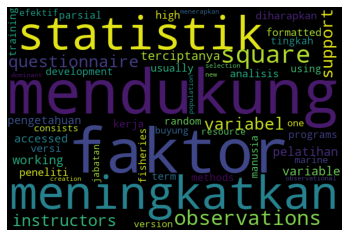

In [56]:
# topic 0
draw_word_cloud(0)

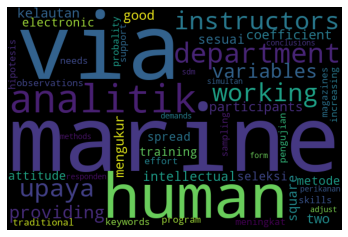

In [57]:
# topic 1
draw_word_cloud(1)  # ...